In [1]:
import nltk
import numpy as np
import pandas as pd
import string
import re
import matplotlib.pyplot as plt

import warnings
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Load Dataset
pd.set_option('display.max_colwidth', 100)
data = pd.read_csv('./data/movie_data.csv', sep = ',')

data = data.sample(frac = 1)
data = data[:1000]

In [2]:
#Processing
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.WordNetLemmatizer()

def clean_text(text):
    # Remove Punctuation
    text = ''.join([word.lower() for word in text if word not in string.punctuation])
    # make Token
    tokens = re.split('\W+', text)
    # Remove StopWords and make Stem
    text = [ps.lemmatize(word) for word in tokens if word not in stopwords]
    return text

In [3]:
# Vectorization -- TF-IDF 
TFIDF_Vect = TfidfVectorizer(analyzer = clean_text)
X_TFIDF = TFIDF_Vect.fit_transform(data['review'])
X_TFIDF_pd = pd.DataFrame(X_TFIDF.toarray(), columns = TFIDF_Vect.get_feature_names())

C:\Users\USER\anaconda3\envs\torch_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [4]:
warnings.filterwarnings('ignore', category = DeprecationWarning)

rf = RandomForestClassifier()
param = {'n_estimators' : [10, 150, 300],
         'max_depth' : [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv = 3, n_jobs = 1)
gs_fit = gs.fit(X_TFIDF_pd, data['sentiment'])
result1 = pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending = False)

In [5]:
svc = SVC(kernel = 'rbf' , probability=True)
param = {'gamma' : [0.1, 0.5, 1],
         'C' : [1, 5, 10]}

gs2 = GridSearchCV(svc, param, cv = 3, n_jobs = 1)
gs_fit2 = gs2.fit(X_TFIDF_pd, data['sentiment'])
result2 = pd.DataFrame(gs_fit2.cv_results_).sort_values('mean_test_score', ascending = False)

In [6]:
gbc = GradientBoostingClassifier()
param = {'n_estimators' : [100, 300, 500]}

gs3 = GridSearchCV(gbc, param, cv = 3, n_jobs = 1)
gs_fit3 = gs3.fit(X_TFIDF_pd, data['sentiment'])
result3 = pd.DataFrame(gs_fit3.cv_results_).sort_values('mean_test_score', ascending = False)

In [7]:
result1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
8,5.135374,0.039470,0.152327,0.001570,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.754491,0.792793,0.795796,0.781027,0.018803,1
2,4.456469,0.009802,0.147657,0.000454,30,300,"{'max_depth': 30, 'n_estimators': 300}",0.757485,0.786787,0.789790,0.778021,0.014572,2
1,2.308576,0.026626,0.125042,0.001034,30,150,"{'max_depth': 30, 'n_estimators': 150}",0.748503,0.780781,0.792793,0.774026,0.018702,3
4,2.643160,0.022260,0.127351,0.000717,60,150,"{'max_depth': 60, 'n_estimators': 150}",0.748503,0.792793,0.780781,0.774026,0.018702,4
10,2.656111,0.045792,0.127847,0.000616,None,150,"{'max_depth': None, 'n_estimators': 150}",0.772455,0.771772,0.777778,0.774002,0.002685,5
11,5.167225,0.038098,0.155262,0.002215,None,300,"{'max_depth': None, 'n_estimators': 300}",0.778443,0.771772,0.768769,0.772995,0.004043,6
5,5.101667,0.079962,0.153255,0.001406,60,300,"{'max_depth': 60, 'n_estimators': 300}",0.766467,0.765766,0.777778,0.770004,0.005505,7
7,2.632949,0.054191,0.127633,0.000725,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.757485,0.774775,0.771772,0.768011,0.007543,8
0,0.294309,0.006048,0.105337,0.000839,30,10,"{'max_depth': 30, 'n_estimators': 10}",0.667665,0.690691,0.684685,0.681013,0.009752,9
9,0.313756,0.000363,0.104235,0.000635,None,10,"{'max_depth': None, 'n_estimators': 10}",0.637725,0.666667,0.699700,0.668030,0.025320,10


In [8]:
result2 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
6,15.900163,0.151481,3.662973,0.004689,10,0.1,"{'C': 10, 'gamma': 0.1}",0.805389,0.765766,0.828829,0.799995,0.026026,1
4,16.343488,0.272343,3.753860,0.020528,5,0.5,"{'C': 5, 'gamma': 0.5}",0.796407,0.768769,0.816817,0.793998,0.019689,2
7,15.919805,0.084495,3.776709,0.014196,10,0.5,"{'C': 10, 'gamma': 0.5}",0.796407,0.768769,0.816817,0.793998,0.019689,2
5,15.986959,0.079226,3.764072,0.030478,5,1,"{'C': 5, 'gamma': 1}",0.790419,0.774775,0.813814,0.793003,0.016042,4
8,15.967508,0.068486,3.769930,0.002924,10,1,"{'C': 10, 'gamma': 1}",0.790419,0.774775,0.813814,0.793003,0.016042,4
3,15.753289,0.088384,3.669983,0.016453,5,0.1,"{'C': 5, 'gamma': 0.1}",0.808383,0.771772,0.792793,0.790983,0.015001,6
2,16.531608,0.201051,3.806312,0.030359,1,1,"{'C': 1, 'gamma': 1}",0.775449,0.753754,0.792793,0.773999,0.015971,7
1,15.792768,0.074156,3.784552,0.051428,1,0.5,"{'C': 1, 'gamma': 0.5}",0.775449,0.762763,0.774775,0.770996,0.005828,8
0,15.939675,0.176429,3.770827,0.034820,1,0.1,"{'C': 1, 'gamma': 0.1}",0.514970,0.513514,0.513514,0.513999,0.000687,9


In [9]:
result3 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
1,129.069620,0.836985,0.112977,0.001999,300,{'n_estimators': 300},0.766467,0.765766,0.738739,0.756991,0.012909,1
2,216.982932,1.661552,0.113296,0.001281,500,{'n_estimators': 500},0.757485,0.753754,0.753754,0.754998,0.001759,2
0,42.822435,0.671084,0.110632,0.000654,100,{'n_estimators': 100},0.742515,0.765766,0.738739,0.749006,0.011950,3


In [64]:
rf_scores = result1['mean_test_score'][:3]
rf_scores

8    0.781027
2    0.778021
1    0.774026
Name: mean_test_score, dtype: float64

In [65]:
svm_scores = result2['mean_test_score'][:3]
svm_scores

6    0.799995
4    0.793998
7    0.793998
Name: mean_test_score, dtype: float64

In [66]:
gb_scores = result3['mean_test_score'][:3]
gb_scores

1    0.756991
2    0.754998
0    0.749006
Name: mean_test_score, dtype: float64

In [67]:
rf_scores = np.array(rf_scores)
svm_scores = np.array(svm_scores)
gb_scores = np.array(gb_scores)

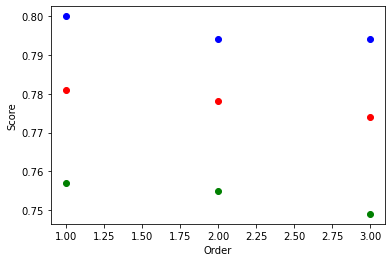

In [70]:
%matplotlib inline

x = np.array([1,2,3])
plt.figure()
plt.scatter(x, rf_scores, c = 'r')
plt.scatter(x, svm_scores, c = 'b')
plt.scatter(x, gb_scores, c = 'g')
plt.xlabel("Order")
plt.ylabel("Score")
plt.show()